## Vanilla Consumption Savings model - First try

Consider the following **consumption-saving model**:

$$ 
\begin{aligned}
v_{t}(m_{t}) &= \max_{c_t}\frac{c^{1-\rho}}{1-\rho} + \beta \mathbb{E}_t[v_{t+1}(m_{t+1})] \\
& \text{s.t.} \\ 
a_{t}&=m_{t}-c_{t} \\
m_{t+1}&= R a_{t} + \tilde{\xi}_{t+1}\\
a_t&\geq 0\\
\end{aligned}$$

where

$$ 
\begin{aligned}
\log\xi_{t+1} \sim \mathcal{N}(-0.5\sigma_{\xi}^{2},\sigma_{\xi}^{2})
\end{aligned} $$

In the **last period** everything is consumed such that

$$ 
\begin{aligned}
v_{T}(m_{T}) = \frac{m_T^{1-\rho}}{1-\rho} 
\end{aligned} $$

In [37]:
# imports
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
from numba import njit, prange, int64, double
from vanilla_class import VanillaClass 

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
# instantiate model
model = VanillaClass(name='test')

In [29]:
# solve model
model.solve()
model.simulate()

model solved in 2.9 seconds
model simulated in 0.1 seconds


In [30]:
# unpack
par = model.par
sol = model.sol
sim = model.sim

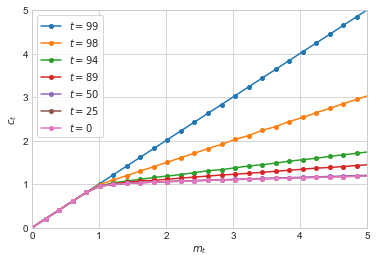

In [31]:
# plot consumption function
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for t in [par.T-1, par.T-2, par.T-6, par.T-11, 50, 25, 0]:
    if t >= 0: ax.plot(par.grid_m,sol.c[t,:],'-o',ms=4,label=f'$t = {t}$')

# layout
ax.legend(frameon=True)
ax.set_xlim([0,5])
ax.set_ylim([0,5])
ax.set_xlabel('$m_t$')
ax.set_ylabel('$c_t$');

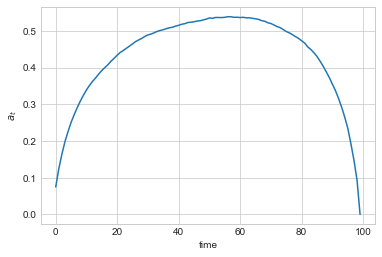

In [32]:
# time profile of end-of-period assets
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(np.arange(par.T),np.mean(sim.a,axis=1))

# layout
ax.set_xlabel('time')
ax.set_ylabel('$a_t$');

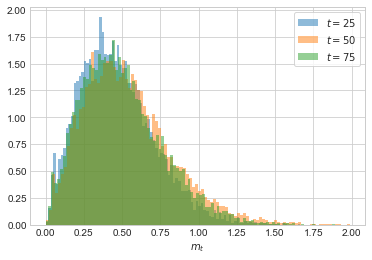

In [33]:
# histograms of end-of-period assets
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for t in [25,50,75]:
    if t < par.T-1: ax.hist(sim.a[t,:],bins=100,alpha=0.5,label=f'$t = {t}$',density=True)

# layout
ax.legend(frameon=True)
ax.set_xlabel('$m_t$');